In [2]:
import pandas as pd
import matplotlib.pyplot as plot
input_data = pd.read_csv("ready_for_analysis_01282023.csv")


In [4]:
input_data.info

<bound method DataFrame.info of                       Data Paper                  Research Paper  \
0     ﻿10.1016/j.dib.2019.104570               S0531556519301706   
1      10.1016/j.dib.2016.03.011               S0032386116300544   
2      10.1016/j.dib.2019.104216               S0732312318300774   
3      10.1016/j.dib.2018.04.128               S0164070416302270   
4      10.1016/j.dib.2017.07.049               S1053811917305050   
...                          ...                             ...   
4020   10.1016/j.dib.2022.108506    10.1016/j.gendis.2022.04.017   
4021   10.1016/j.dib.2022.107966   10.1016/j.jclepro.2021.125924   
4022   10.1016/j.dib.2022.108300    10.1016/j.quaint.2022.02.033   
4023   10.1016/j.dib.2022.108664      10.1016/j.bonr.2021.101122   
4024   10.1016/j.dib.2022.108102  10.1016/j.foodcont.2022.108825   

                                               Dauthors  \
0     ['Brown, Lemuel A.', 'Judge, Jennifer L.', 'Ma...   
1     ['Zhao, Yue', 'Yoshida, Mir

In [5]:
input_data.describe()

,Dnumber,Rnumber,RBO,Jaccard,LevenshteinDistance,LevenshteinRatio
count,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000
mean,5.644224,6.345093,0.868038,0.922893,1.853913,0.867087
std,3.639868,5.381833,0.254824,0.148616,4.260355,0.176053
min,1.000000,1.000000,0.000000,0.105263,0.000000,0.190476
25%,3.000000,4.000000,0.873016,0.888889,0.000000,0.736842
50%,5.000000,5.000000,1.000000,1.000000,0.000000,1.000000
75%,7.000000,8.000000,1.000000,1.000000,2.000000,1.000000
max,43.000000,81.000000,1.000000,1.000000,72.000000,1.000000


In [5]:
input_data.describe(include = 'all')

,﻿Data_paper_ID,Original_paper_ID,Data_paper_authors,Original_paper_authors,data_number,ori_number,Discipline,Subject,Ajusted_RBO,Jaccard,MAP
count,4025,4025,4025,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025.000000,4025.000000
unique,4025,3991,3982,3973,NaN,NaN,55,8,NaN,NaN,NaN
top,10.1016/j.dib.2019.104570,S1043466616305579,"['Wintrob, Zachary A.P.', 'Hammel, Jeffrey P.'...","['Wintrob, Zachary A.P.', 'Hammel, Jeffrey P.'...",NaN,NaN,"Biochemistry, Genetics and Molecular Biology",Biological sciences,NaN,NaN,NaN
freq,1,9,6,9,NaN,NaN,369,1196,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.644224,6.345093,NaN,NaN,0.869349,0.943713,0.067107
std,NaN,NaN,NaN,NaN,3.639868,5.381833,NaN,NaN,0.255359,0.153139,0.025670
min,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,3.000000,4.000000,NaN,NaN,0.874969,1.000000,0.056145
50%,NaN,NaN,NaN,NaN,5.000000,5.000000,NaN,NaN,1.000000,1.000000,0.076852
75%,NaN,NaN,NaN,NaN,7.000000,8.000000,NaN,NaN,1.000000,1.000000,0.084000


In [6]:
m = input_data.iloc[[0],[7]]
print(m)

               Subject
0  Biological sciences


Text(0.5, 1.0, 'Suject distribution of the selected papers')

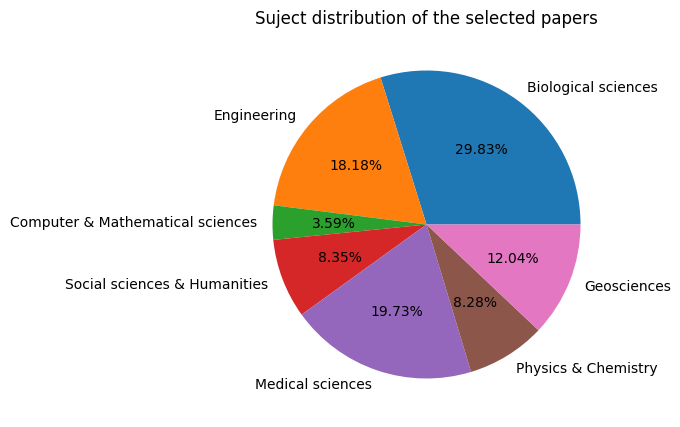

In [31]:
subject_list = {}
for i in range(0, 4025):
    if input_data.iloc[i,7] in subject_list.keys():
        subject_list[input_data.iloc[i,7]] = subject_list[input_data.iloc[i,7]] + 1
    else:
        subject_list[input_data.iloc[i,7]] = 1

frequentwords = list(subject_list.keys())[:7]
frequentvals = list(subject_list.values())[:7]
plot.figure(figsize=(12,5))
plot.pie(frequentvals, labels = frequentwords, autopct='%.2f%%')
plot.title("Suject distribution of the selected papers")

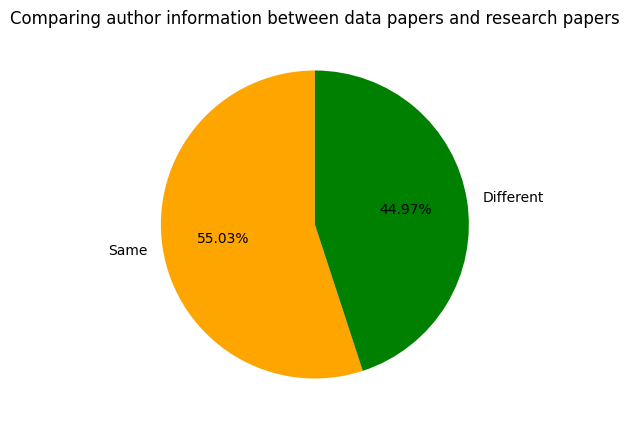

2215 1810


In [41]:
count_ldistance = 0
for i in range(0, 4025):
  if input_data.iloc[i,10] == 0:
    count_ldistance += 1

remain = 4025 - count_ldistance

plot.figure(figsize = (12,5))
thelabels = ['Same','Different']
plot.pie([count_ldistance, remain], labels = thelabels, autopct='%.2f%%', startangle = 90, colors = ["orange","green"])
plot.title("Comparing author information between data papers and research papers")
plot.show()

print(count_ldistance, remain)

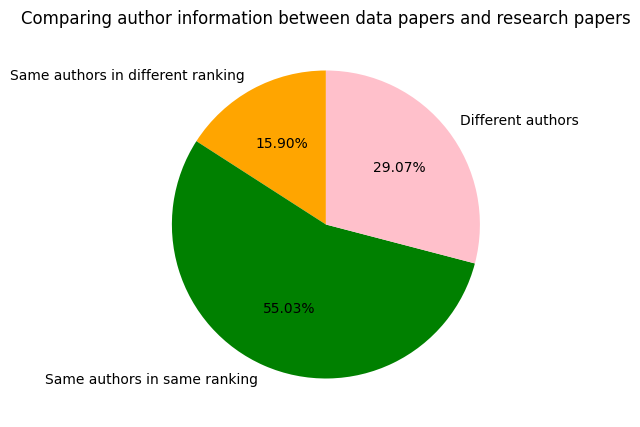

640 2215 1170


In [42]:
count_jaccard_the_same = 0 #这里比较的是出现的作者人名是否一样
different = 0

for i in range(0, 4025):
    if input_data.iloc[i,10] != 0 and input_data.iloc[i,9] == 1:
        count_jaccard_the_same += 1
    elif input_data.iloc[i,10] != 0 and input_data.iloc[i,9] != 1:
        different += 1

plot.figure(figsize = (12,5))
thelabels = ['Same authors in different ranking','Same authors in same ranking', 'Different authors']
plot.pie([count_jaccard_the_same, count_ldistance, different], labels = thelabels, autopct='%.2f%%', startangle = 90, colors = ["orange","green","pink"])
plot.title("Comparing author information between data papers and research papers")
plot.show()

print(count_jaccard_the_same, count_ldistance, different)

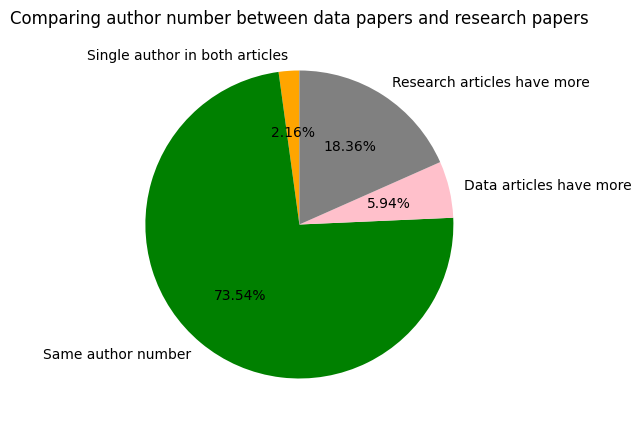

2960 87 239 739


In [40]:
count_single = 0 #这里比较的是两篇文章的作者数量是否一样
count_same = 0
count_dh = 0
count_rh = 0
for i in range(0, 4025):
    dr = input_data.iloc[i,4] #data paper的作者数量
    rr = input_data.iloc[i,5] #research paper的作者数量
    if dr == rr:
        if dr == 1:
            count_single += 1
        else:
            count_same += 1
    elif dr > rr:
        count_dh += 1
    else:
        count_rh += 1

plot.figure(figsize = (12,5))
thelabels = ['Single author in both articles','Same author number', 'Data articles have more', 'Research articles have more']
plot.pie([count_single, count_same, count_dh, count_rh], labels = thelabels, autopct='%.2f%%', startangle = 90, colors = ["orange","green","pink", "grey"])
plot.title("Comparing author number between data papers and research papers")
plot.show()

print(count_same, count_single, count_dh, count_rh)

[0.8613747233612044, 0.8969057743895746, 0.8508202900069446, 0.8566290836477608, 0.8565860893299624, 0.8789862972620479, 0.8632339340207047]


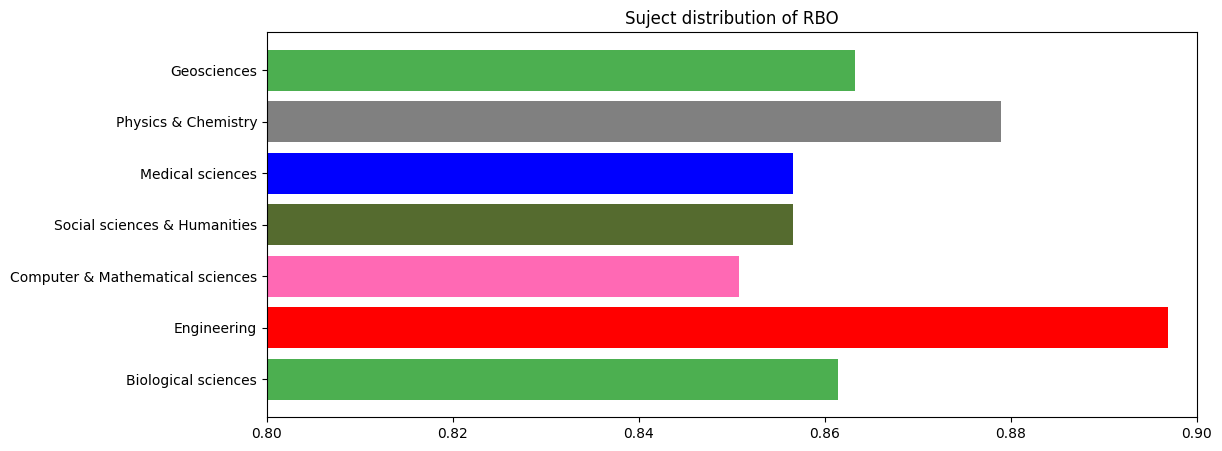

In [30]:
#分析不同学科的平均rbo情况

subject_list = {}
rbo_list = {}
averagerbo = {}
for i in range(0, 4025):
    if input_data.iloc[i,7] in subject_list.keys():
        subject_list[input_data.iloc[i,7]] = subject_list[input_data.iloc[i,7]] + 1
        rbo_list[input_data.iloc[i,7]] = rbo_list[input_data.iloc[i,7]] + input_data.iloc[i,8] #这里rbo_list保存的是每个学科rbo的平均值
    else:
        subject_list[input_data.iloc[i,7]] = 1
        rbo_list[input_data.iloc[i,7]] = input_data.iloc[i,8]

for i in subject_list.keys():
    averagerbo[i] = rbo_list[i]/subject_list[i]

frequentwords = list(averagerbo.keys())[:7]
frequentvals = list(averagerbo.values())[:7]
plot.figure(figsize=(12,5))
plot.barh(frequentwords, frequentvals, color = ["#4CAF50","red","hotpink","#556B2F", "blue", "grey"])
plot.title("Suject distribution of RBO")
plot.xlim(0.8,0.9)
print(frequentvals)

  

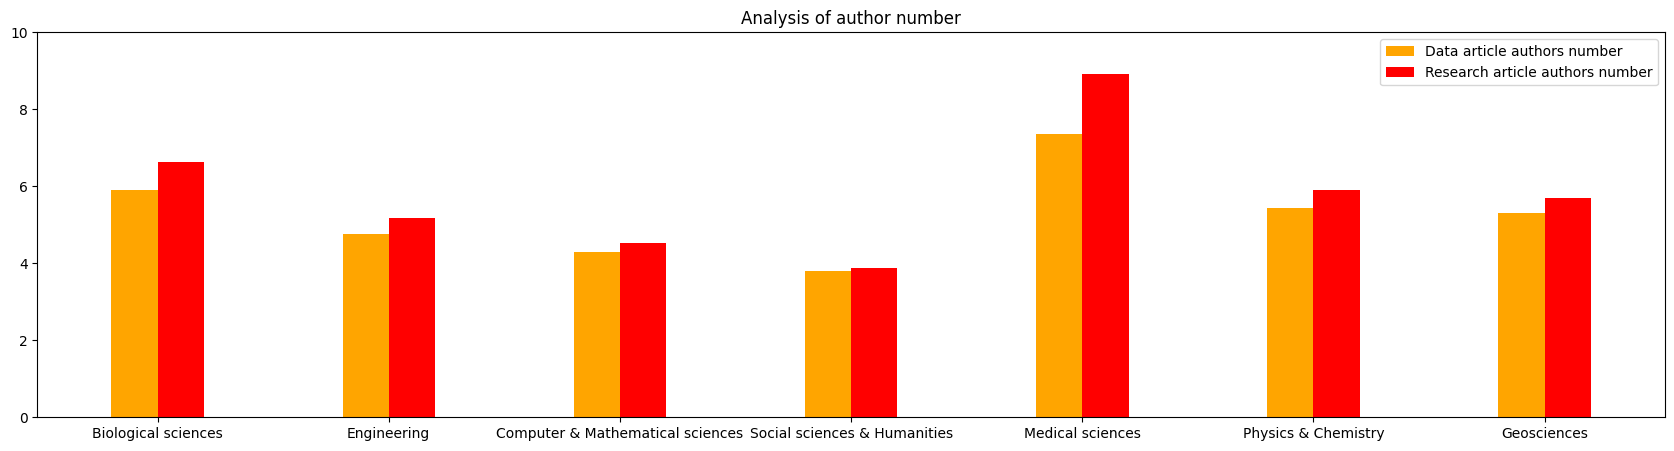

In [12]:
#分析不同学科的平均作者数量
import numpy as np

subject_list = {}
dataauthor_list = {}
average_dataauthor = {}
researchauthor_list = {}
average_researchauthor = {}

for i in range(0, 4025):
    if input_data.iloc[i,7] in subject_list.keys():
        subject_list[input_data.iloc[i,7]] = subject_list[input_data.iloc[i,7]] + 1
        dataauthor_list[input_data.iloc[i,7]] = dataauthor_list[input_data.iloc[i,7]] + input_data.iloc[i,4] #这里dataauthor_list保存的是每个学科data paper作者数量的平均值
        researchauthor_list[input_data.iloc[i,7]] =  researchauthor_list[input_data.iloc[i,7]] + input_data.iloc[i,5] #这里researchauthor_list保存的是每个学科research paper作者数量的平均值
    else: 
        subject_list[input_data.iloc[i,7]] = 1
        dataauthor_list[input_data.iloc[i,7]] = input_data.iloc[i,4]
        researchauthor_list[input_data.iloc[i,7]] = input_data.iloc[i,5]

for i in subject_list.keys():
    average_dataauthor[i] = dataauthor_list[i]/subject_list[i]
    average_researchauthor[i] = researchauthor_list[i]/subject_list[i] 

frequent_da_words = list(average_dataauthor.keys())[:7]
frequent_da_vals = list(average_dataauthor.values())[:7]

frequent_ra_words = list(average_researchauthor.keys())[:7]
frequent_ra_vals = list(average_researchauthor.values())[:7]

size = 7
x = np.arange(size)
plot.figure(figsize=(21,5))
total_width, n = 1.2, 6
width = total_width / n
x = x - (total_width - width) / 2

plot.bar(x- 0.5*width, frequent_da_vals,  width=width, label='Data article authors number', color = "orange")
plot.bar(x+0.5*width, frequent_ra_vals,  width=width, label='Research article authors number', color ="red")

plot.xticks(x,frequent_ra_words)

plot.title("Analysis of author number")
plot.ylim(0,10)
plot.legend()
plot.show()



